In [12]:
import numpy as np
from numpy import exp, pi, sin, cos
import matplotlib.pyplot as plt

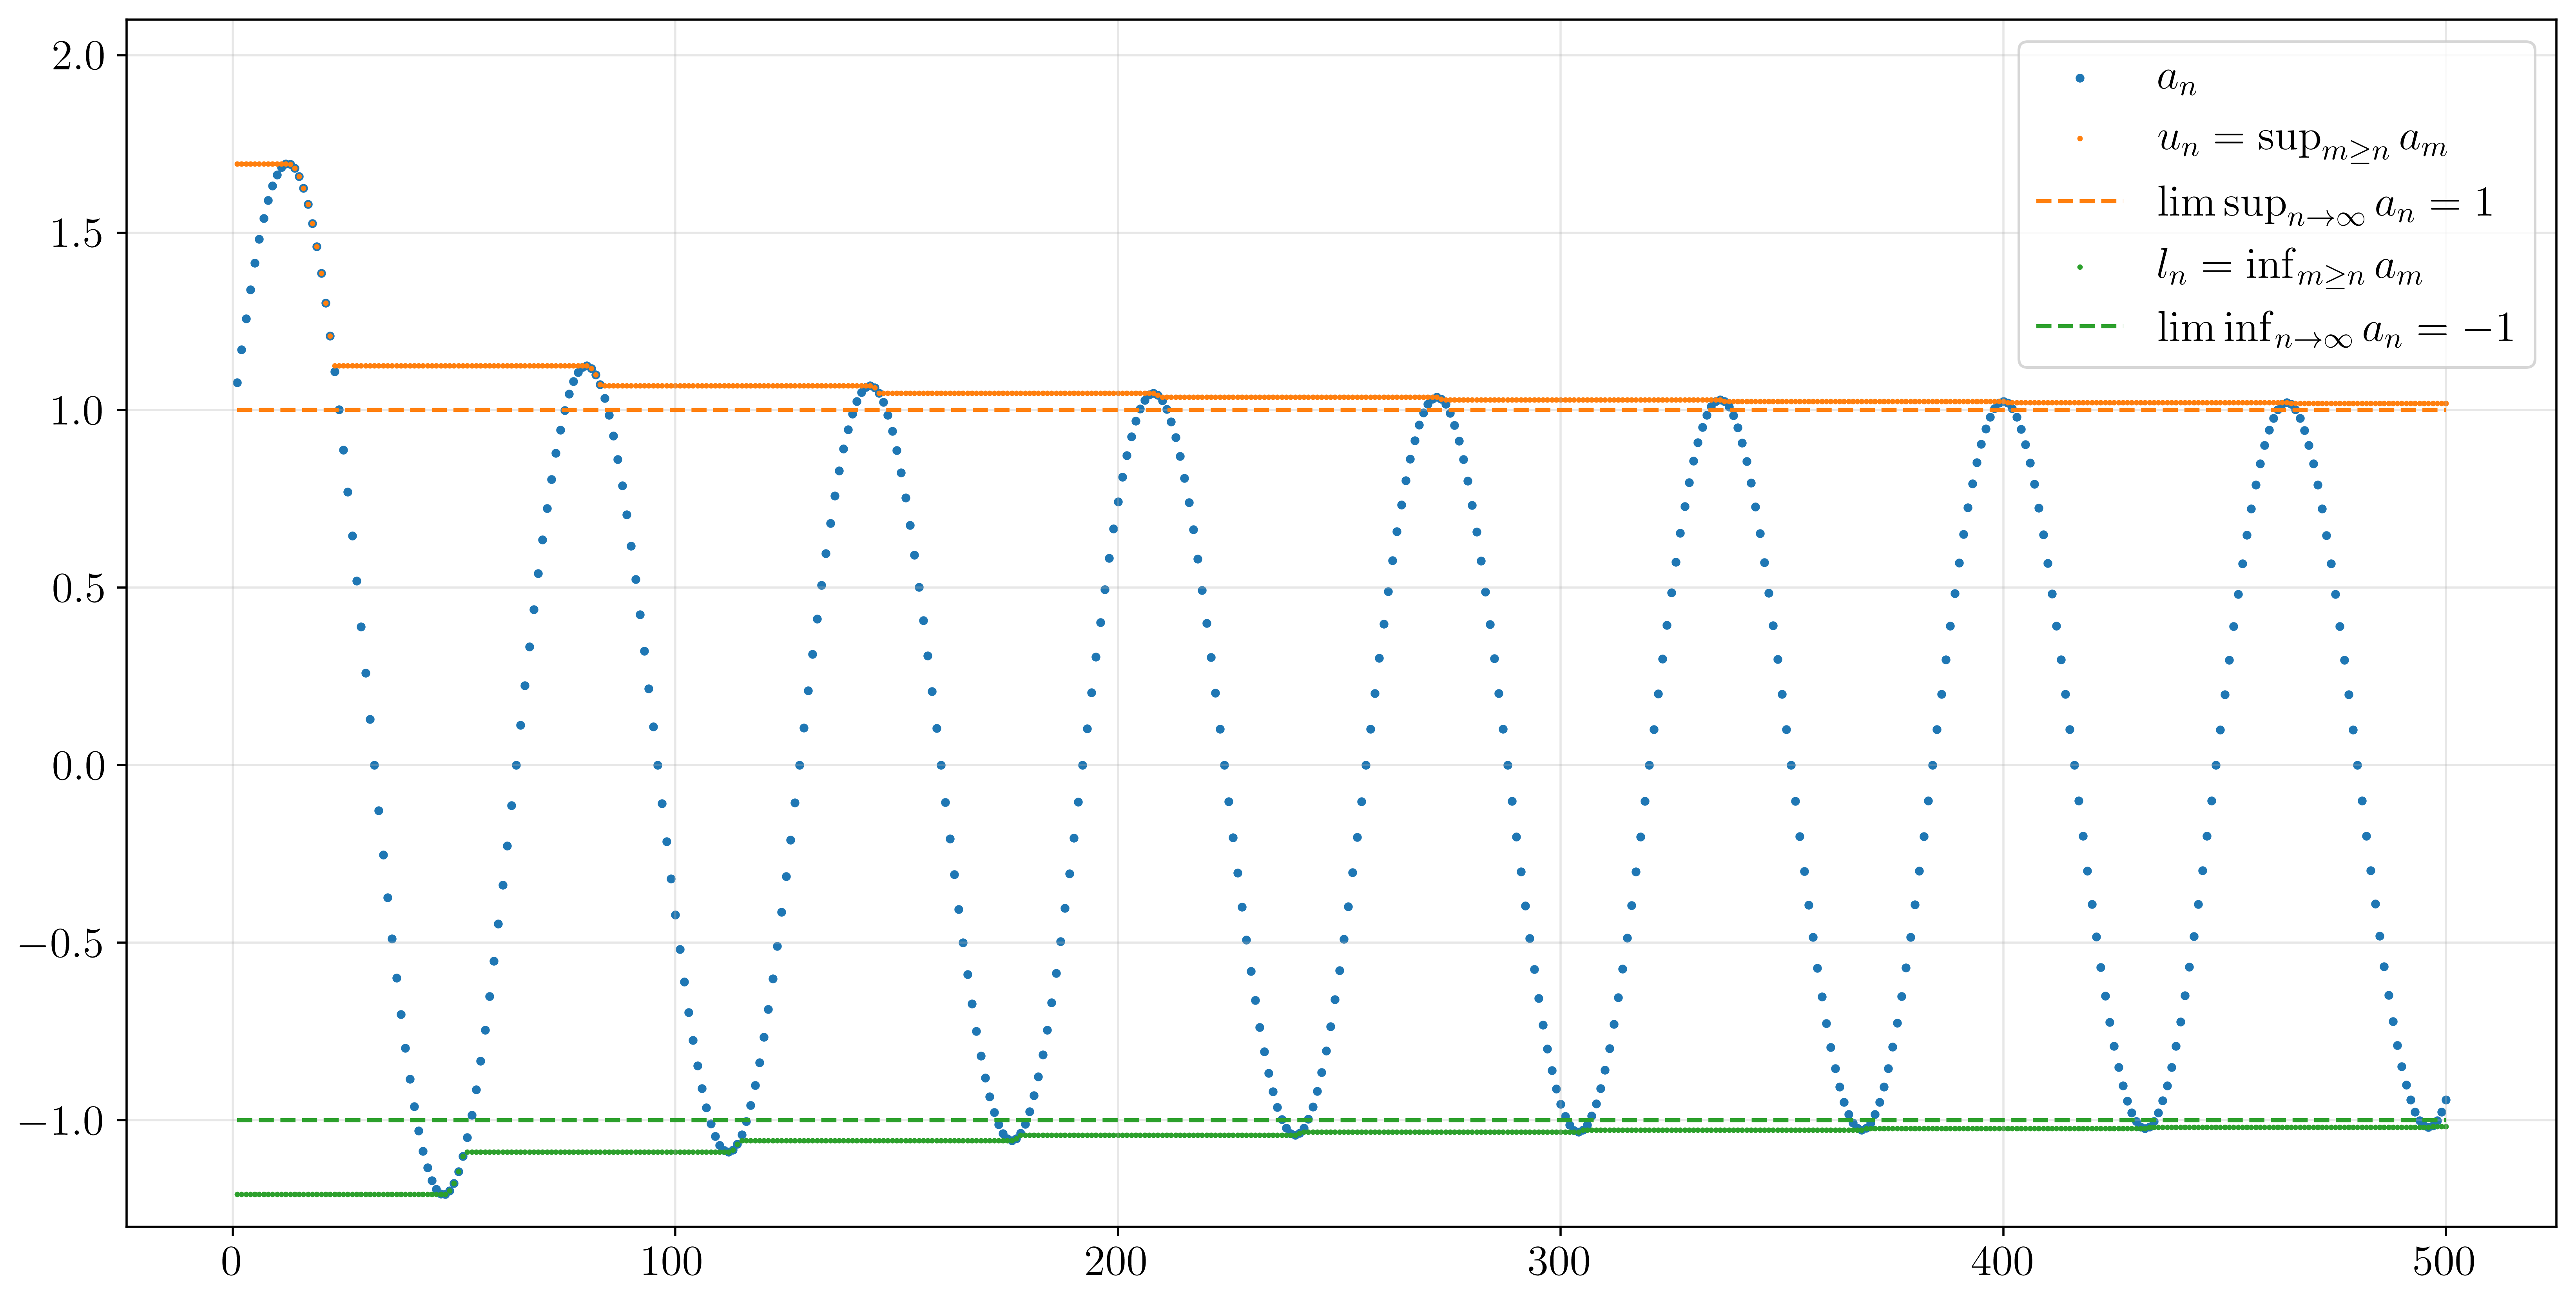

In [10]:
plt.rc('text', usetex=True)
font = {
    'font.family' : 'serif',
    'font.weight' : 'bold',
    'font.size'   : 16
}
plt.rcParams.update(font)

fig, ax = plt.subplots(figsize=(16, 8), dpi=500)

# plot sequence a_n
a = lambda n : (1 + 10/n) * sin(n * pi / 32)
n = 500
ns = np.arange(1, n+1)
plt.scatter(
    ns, a(ns),
    label="$a_n$",
    s=5
)

# plot sup u_n
N = 1000
Ns = np.arange(1, N+1)
u = [np.max(a(Ns[i:])) for i in range(n)]
plt.scatter(
    ns, u,
    s=1,
    label="$u_n = \sup_{m \geq n} a_m$"
)
plt.hlines(
    1,
    xmin=1, xmax=n,
    colors="C1",
    ls="--",
    label="$\limsup_{n \\to \infty} a_n = 1$"
)

# plot inf l_n
l = [np.min(a(Ns[i:])) for i in range(n)]
plt.scatter(
    ns, l,
    s=1,
    label="$l_n = \inf_{m \geq n} a_m$"
)
plt.hlines(
    -1,
    xmin=1, xmax=n,
    colors="C2",
    ls="--",
    label="$\liminf_{n \\to \infty} a_n = -1$"
)

plt.ylim(-1.3, 2.1)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

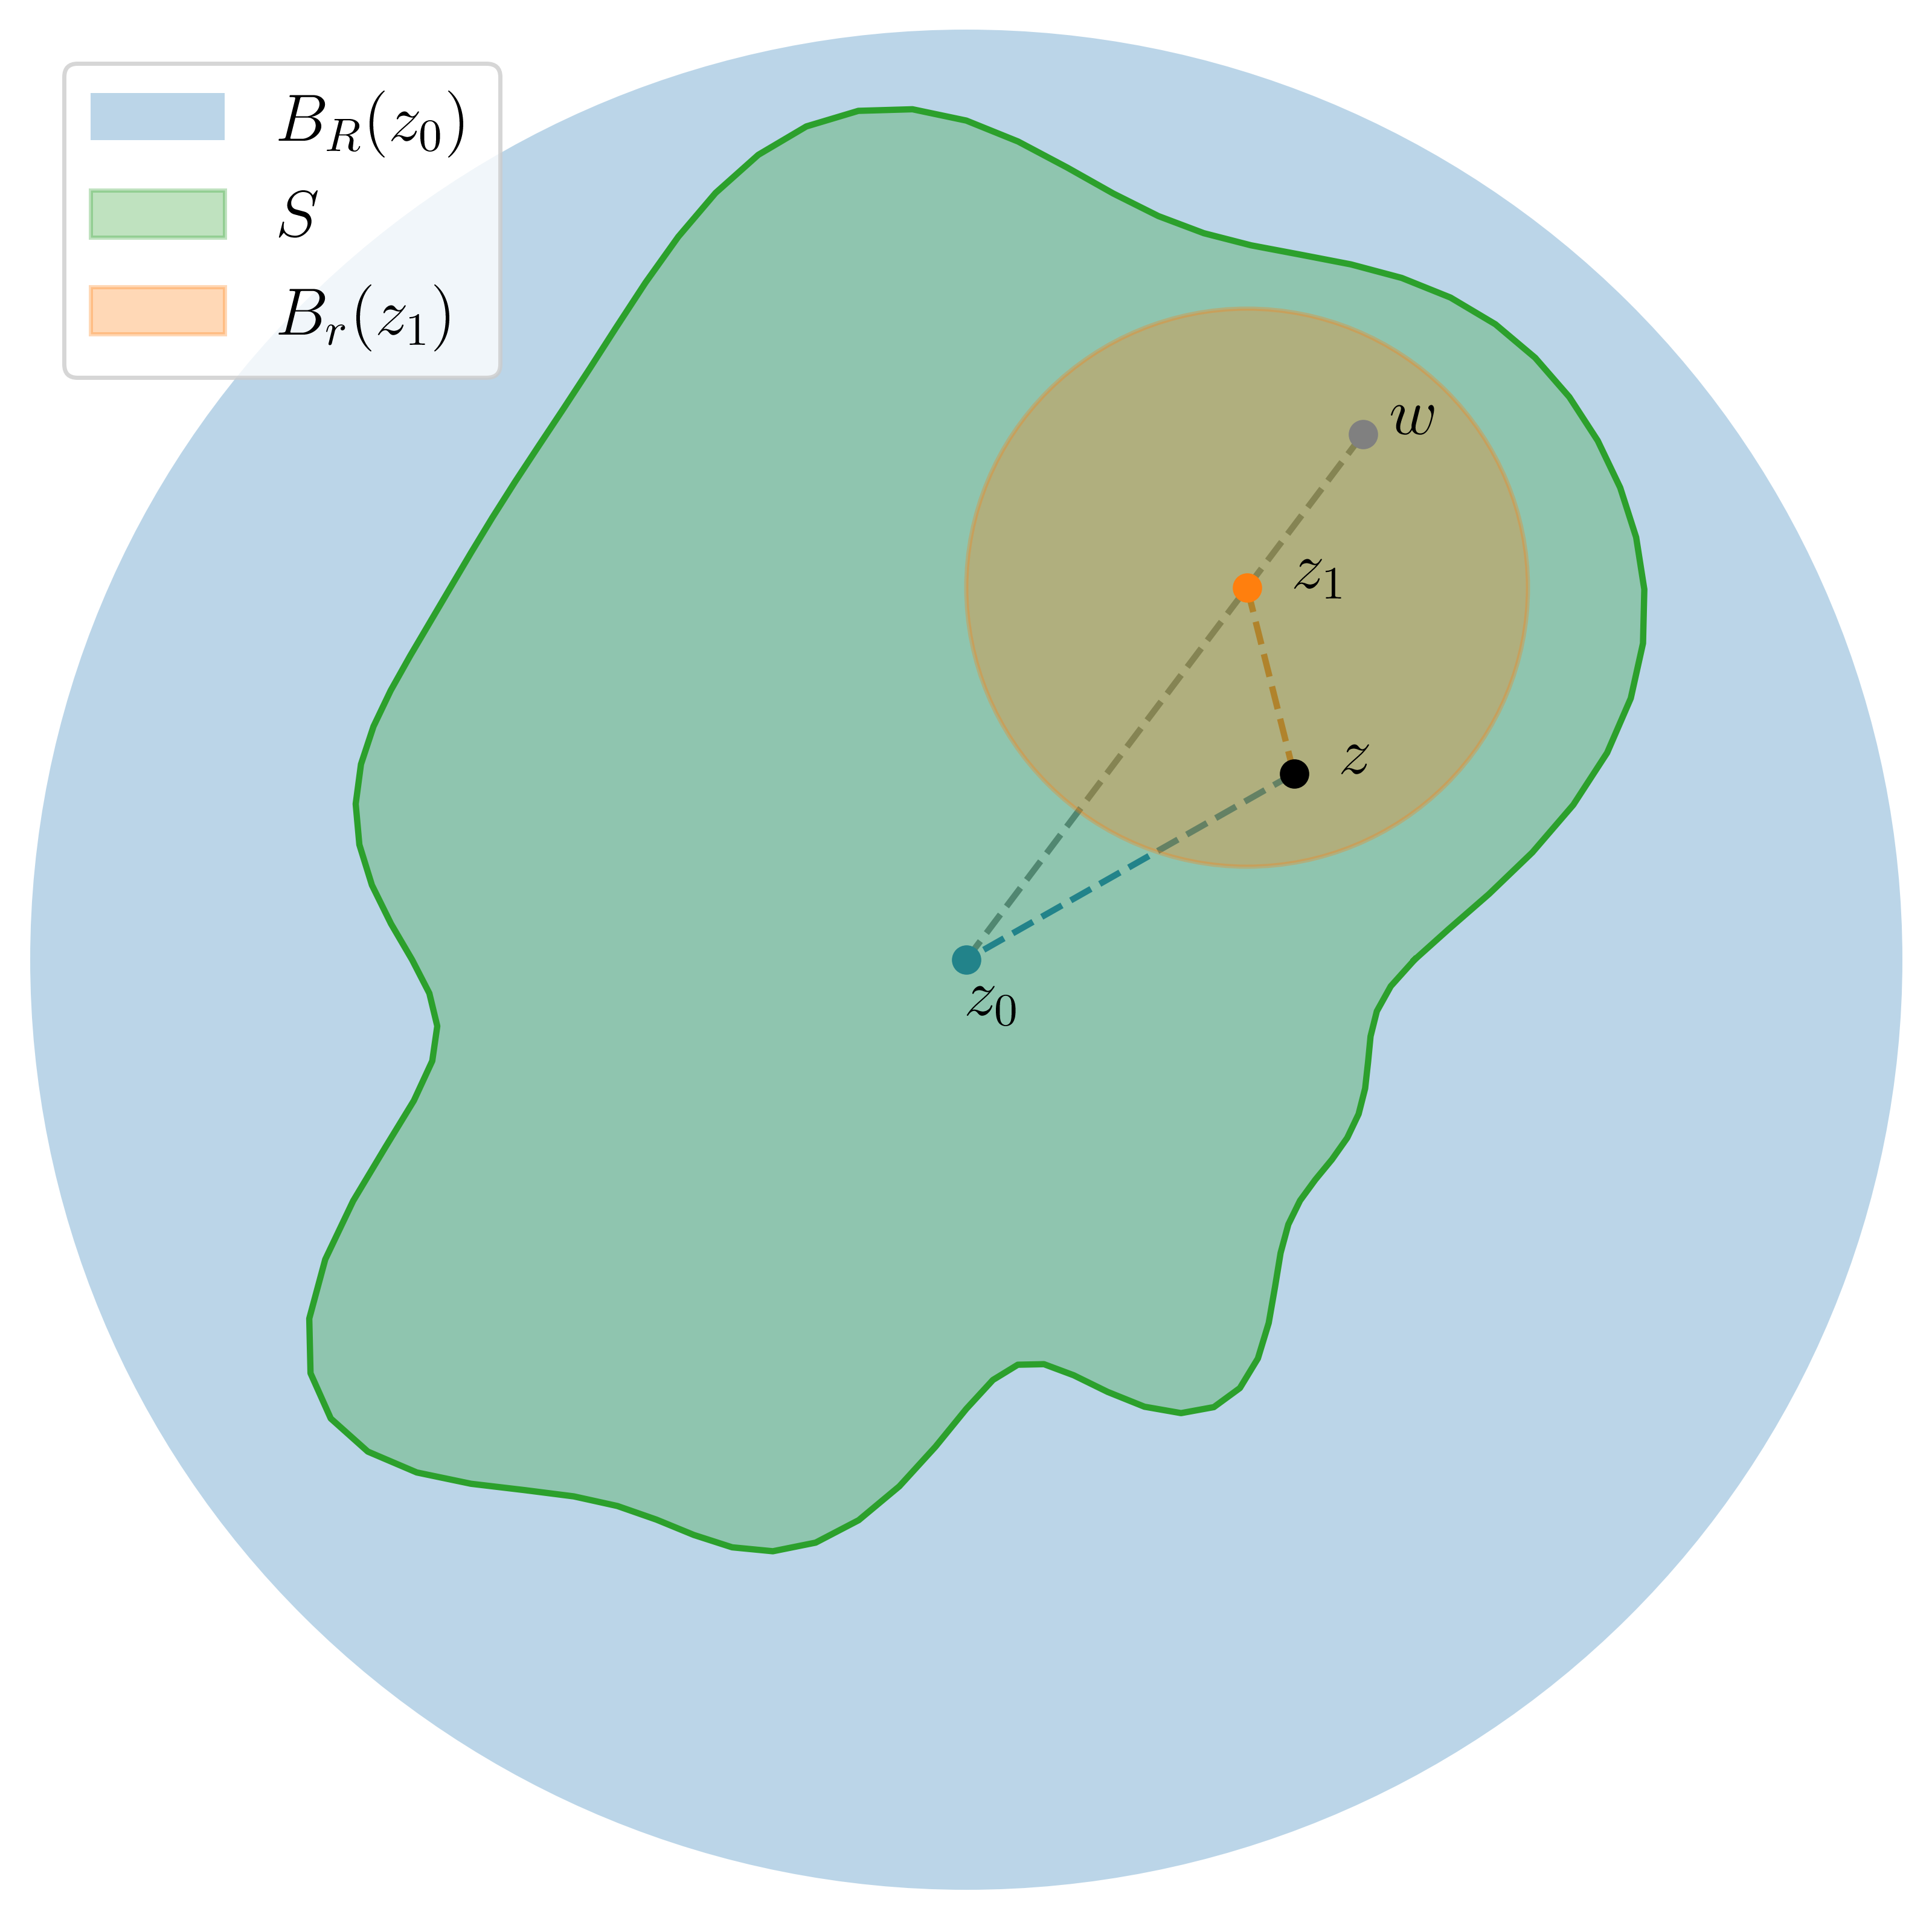

In [107]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=500)

z = 0.35 + 0.2j
plt.scatter(
    z.real, z.imag,
    color="k",
    zorder=5
)
plt.text(
    z.real+0.05, z.imag,
    "$z$",
)


R = 1
z0 = 0 + 0j
plt.scatter(
    z0.real, z0.imag
)
plt.text(
    z0.real, z0.imag-0.06,
    "$z_0$",
)
BR = plt.Circle(
    (z0.real, z0.imag), R,
    label="$B_R(z_0)$",
    alpha=0.3
)
ax.add_patch(BR)



# random closed curve
np.random.seed(39)

# randomize amplitude and phase
H = 10
rho = np.random.rand(H) * np.logspace(-0.5, -1.5, H)
phi = np.random.rand(H) * 2 * pi

# accumulate r(t) over t=[0,2*pi]
t = np.linspace(0, 2 * pi, 101)
r = np.ones_like(t)
for h in range(H):
    r = r + rho[h] * sin(h * t + phi[h]);  

# reconstruct x(t), y(t)
r = r / (np.max(r) + 0.1)
x = r * cos(t)
y = r * sin(t)
plt.plot(
    x, y,
    color="C2"
)
plt.fill(
    x, y,
    alpha=0.3,
    color="C2",
    label="$S$"
)




r = 0.3
z1 = 0.3 + 0.4j
plt.scatter(
    z1.real, z1.imag
)
plt.text(
    z1.real+0.05, z1.imag,
    "$z_1$",
)
Br = plt.Circle(
    (z1.real, z1.imag), r,
    label="$B_r(z_1)$",
    color="C1",
    alpha=0.3
)
ax.add_patch(Br)



plt.plot(
    [z.real, z0.real],
    [z.imag, z0.imag],
    ls="--",
    zorder = 0
)
plt.plot(
    [z.real, z1.real],
    [z.imag, z1.imag],
    ls="--",
    zorder = 0
)


w = z1 + np.abs(z - z1) / np.abs(z1 - z0) * (z1 - z0)
plt.scatter(
    w.real, w.imag,
    color="gray"
)
plt.text(
    w.real+0.03, w.imag,
    "$w$"
)
plt.plot(
    [z0.real, w.real],
    [z0.imag, w.imag],
    ls="--",
    color="gray",
    zorder=0
)


plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis("off")
plt.legend()
plt.grid(alpha=0.3)
plt.show()